# Import Statements and Initialisation

In [2]:
%run "ZeroMQ Python Connector".py
%load_ext autoreload
%autoreload
%matplotlib notebook
import pandas as pd
from functools import partial

#Create connector instance, with particular port for PUSH, PULL and SUB
connector = DWX_ZeroMQ_Connector()

[INIT] Ready to send commands to METATRADER (PUSH): 32768
[INIT] Listening for responses from METATRADER (PULL): 32769
[INIT] Listening for market data from METATRADER (SUB): 32770


# Subscribing to Tick Data

In [2]:
connector._DWX_MTX_SUBSCRIBE_MARKETDATA_('GBPUSD')

[KERNEL] Subscribed to GBPUSD BID/ASK updates. See self._Market_Data_DB.

[GBPUSD] 2019.05.30 04:41:41 (1.262560/1.262640) BID/ASK

[GBPUSD] 2019.05.30 04:41:42 (1.262570/1.262640) BID/ASK


In [5]:
connector._Market_Data_DB

{'GBPUSD': [{'Time': Timestamp('2019-05-30 04:41:41'),
   'Bid': 1.26256,
   'Ask': 1.26264,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:42'),
   'Bid': 1.26257,
   'Ask': 1.26264,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:49'),
   'Bid': 1.26259,
   'Ask': 1.26264,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:49'),
   'Bid': 1.26265,
   'Ask': 1.26271,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:49'),
   'Bid': 1.26266,
   'Ask': 1.26274,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:50'),
   'Bid': 1.26265,
   'Ask': 1.26274,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:51'),
   'Bid': 1.26265,
   'Ask': 1.26272,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:51'),
   'Bid': 1.26264,
   'Ask': 1.26272,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:53'),
   'Bid': 1.2626,
   'Ask': 1.26268,
   'Flag': 6},
  {'Time': Timestamp('2019-05-30 04:41:54'),
   'Bid': 1.26261,
   'Ask': 1.26268,
   'Flag': 6},
  {'Time': 


[GBPUSD] 2019.05.30 04:42:34 (1.262650/1.262710) BID/ASK

[GBPUSD] 2019.05.30 04:42:35 (1.262650/1.262720) BID/ASK

[GBPUSD] 2019.05.30 04:42:42 (1.262660/1.262720) BID/ASK

[GBPUSD] 2019.05.30 04:42:44 (1.262670/1.262720) BID/ASK

[GBPUSD] 2019.05.30 04:42:54 (1.262650/1.262710) BID/ASK

[GBPUSD] 2019.05.30 04:42:55 (1.262660/1.262700) BID/ASK

[GBPUSD] 2019.05.30 04:43:01 (1.262660/1.262710) BID/ASK

[GBPUSD] 2019.05.30 04:43:01 (1.262640/1.262700) BID/ASK

[GBPUSD] 2019.05.30 04:43:01 (1.262660/1.262700) BID/ASK

[GBPUSD] 2019.05.30 04:43:01 (1.262650/1.262700) BID/ASK


In [33]:
connector._DWX_MTX_UNSUBSCRIBE_MARKETDATA_('GBPUSD')


**
[KERNEL] Unsubscribing from GBPUSD
**



In [27]:
tickdataframe = pd.DataFrame(connector._Market_Data_DB['GBPUSD'])


[GBPUSD] 2019.05.30 13:51:27 (1.262810/1.262870) BID/ASK

[GBPUSD] 2019.05.30 13:51:27 (1.262800/1.262870) BID/ASK

[GBPUSD] 2019.05.30 13:51:28 (1.262790/1.262870) BID/ASK

[GBPUSD] 2019.05.30 13:51:28 (1.262800/1.262870) BID/ASK

[GBPUSD] 2019.05.30 13:51:29 (1.262810/1.262870) BID/ASK


In [29]:
tickdataframe = tickdataframe[['Time','Bid','Ask','Flag']]
tickdataframe

,Time,Bid,Ask,Flag
0,2019-05-30 04:41:41,1.26256,1.26264,6
1,2019-05-30 04:41:42,1.26257,1.26264,6
2,2019-05-30 04:41:49,1.26259,1.26264,6
3,2019-05-30 04:41:49,1.26265,1.26271,6
4,2019-05-30 04:41:49,1.26266,1.26274,6
5,2019-05-30 04:41:50,1.26265,1.26274,6
6,2019-05-30 04:41:51,1.26265,1.26272,6
7,2019-05-30 04:41:51,1.26264,1.26272,6
8,2019-05-30 04:41:53,1.26260,1.26268,6
9,2019-05-30 04:41:54,1.26261,1.26268,6



[GBPUSD] 2019.05.30 13:51:37 (1.262790/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:51:37 (1.262790/1.262850) BID/ASK

[GBPUSD] 2019.05.30 13:51:37 (1.262780/1.262850) BID/ASK

[GBPUSD] 2019.05.30 13:51:37 (1.262810/1.262870) BID/ASK

[GBPUSD] 2019.05.30 13:51:38 (1.262830/1.262890) BID/ASK

[GBPUSD] 2019.05.30 13:51:38 (1.262820/1.262890) BID/ASK

[GBPUSD] 2019.05.30 13:51:38 (1.262830/1.262900) BID/ASK

[GBPUSD] 2019.05.30 13:51:40 (1.262850/1.262920) BID/ASK

[GBPUSD] 2019.05.30 13:51:40 (1.262850/1.262910) BID/ASK

[GBPUSD] 2019.05.30 13:51:40 (1.262830/1.262900) BID/ASK

[GBPUSD] 2019.05.30 13:51:40 (1.262820/1.262900) BID/ASK

[GBPUSD] 2019.05.30 13:51:43 (1.262820/1.262890) BID/ASK

[GBPUSD] 2019.05.30 13:51:43 (1.262810/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:51:43 (1.262810/1.262850) BID/ASK

[GBPUSD] 2019.05.30 13:51:43 (1.262790/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:51:43 (1.262780/1.262850) BID/ASK

[GBPUSD] 2019.05.30 13:51:43 (1.262800/1.262850) BID/ASK

[GBPUSD] 2019

In [26]:
from pandas import HDFStore
hdf = HDFStore('testTickData.h5')


[GBPUSD] 2019.05.30 13:48:56 (1.263070/1.263130) BID/ASK

[GBPUSD] 2019.05.30 13:48:56 (1.263050/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:48:56 (1.263060/1.263110) BID/ASK

[GBPUSD] 2019.05.30 13:48:56 (1.263050/1.263110) BID/ASK

[GBPUSD] 2019.05.30 13:48:56 (1.263060/1.263120) BID/ASK

[GBPUSD] 2019.05.30 13:48:57 (1.263060/1.263130) BID/ASK

[GBPUSD] 2019.05.30 13:48:59 (1.263070/1.263130) BID/ASK

[GBPUSD] 2019.05.30 13:49:00 (1.263080/1.263140) BID/ASK

[GBPUSD] 2019.05.30 13:49:00 (1.263100/1.263160) BID/ASK

[GBPUSD] 2019.05.30 13:49:00 (1.263090/1.263150) BID/ASK

[GBPUSD] 2019.05.30 13:49:00 (1.263080/1.263130) BID/ASK

[GBPUSD] 2019.05.30 13:49:01 (1.263080/1.263120) BID/ASK

[GBPUSD] 2019.05.30 13:49:01 (1.263040/1.263100) BID/ASK

[GBPUSD] 2019.05.30 13:49:01 (1.263040/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:01 (1.263030/1.263080) BID/ASK

[GBPUSD] 2019.05.30 13:49:01 (1.263020/1.263080) BID/ASK

[GBPUSD] 2019.05.30 13:49:02 (1.263060/1.263100) BID/ASK

[GBPUSD] 2019


[GBPUSD] 2019.05.30 13:49:53 (1.263030/1.263080) BID/ASK

[GBPUSD] 2019.05.30 13:49:53 (1.263040/1.263080) BID/ASK

[GBPUSD] 2019.05.30 13:49:53 (1.263040/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:54 (1.263050/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:54 (1.263040/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:56 (1.263040/1.263110) BID/ASK

[GBPUSD] 2019.05.30 13:49:56 (1.263050/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:56 (1.263020/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:56 (1.263020/1.263080) BID/ASK

[GBPUSD] 2019.05.30 13:49:56 (1.263030/1.263080) BID/ASK

[GBPUSD] 2019.05.30 13:49:57 (1.263030/1.263070) BID/ASK

[GBPUSD] 2019.05.30 13:49:57 (1.263030/1.263080) BID/ASK

[GBPUSD] 2019.05.30 13:49:57 (1.263050/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:58 (1.263060/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:58 (1.263050/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:58 (1.263060/1.263090) BID/ASK

[GBPUSD] 2019.05.30 13:49:58 (1.263050/1.263090) BID/ASK

[GBPUSD] 2019


[GBPUSD] 2019.05.30 13:50:51 (1.262920/1.262960) BID/ASK

[GBPUSD] 2019.05.30 13:50:51 (1.262910/1.262960) BID/ASK

[GBPUSD] 2019.05.30 13:50:53 (1.262920/1.262960) BID/ASK

[GBPUSD] 2019.05.30 13:50:53 (1.262930/1.262980) BID/ASK

[GBPUSD] 2019.05.30 13:50:53 (1.262930/1.262990) BID/ASK

[GBPUSD] 2019.05.30 13:50:53 (1.262920/1.262990) BID/ASK

[GBPUSD] 2019.05.30 13:50:53 (1.262920/1.262980) BID/ASK

[GBPUSD] 2019.05.30 13:50:53 (1.262910/1.262950) BID/ASK

[GBPUSD] 2019.05.30 13:50:54 (1.262910/1.262940) BID/ASK

[GBPUSD] 2019.05.30 13:50:54 (1.262890/1.262930) BID/ASK

[GBPUSD] 2019.05.30 13:50:54 (1.262880/1.262950) BID/ASK

[GBPUSD] 2019.05.30 13:50:54 (1.262880/1.262930) BID/ASK

[GBPUSD] 2019.05.30 13:50:54 (1.262870/1.262930) BID/ASK

[GBPUSD] 2019.05.30 13:50:55 (1.262870/1.262920) BID/ASK

[GBPUSD] 2019.05.30 13:50:55 (1.262880/1.262920) BID/ASK

[GBPUSD] 2019.05.30 13:50:55 (1.262880/1.262930) BID/ASK

[GBPUSD] 2019.05.30 13:50:56 (1.262870/1.262930) BID/ASK

[GBPUSD] 2019

In [31]:
hdf.put('testdata',tickdataframe,format='table',data_columns=True)


[GBPUSD] 2019.05.30 13:51:56 (1.262770/1.262820) BID/ASK

[GBPUSD] 2019.05.30 13:51:56 (1.262770/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:51:58 (1.262760/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:51:58 (1.262780/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:51:58 (1.262770/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:51:58 (1.262780/1.262850) BID/ASK

[GBPUSD] 2019.05.30 13:51:58 (1.262780/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:51:58 (1.262780/1.262820) BID/ASK

[GBPUSD] 2019.05.30 13:51:59 (1.262780/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:51:59 (1.262770/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:51:59 (1.262770/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:52:00 (1.262770/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:52:00 (1.262770/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:52:01 (1.262770/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:52:01 (1.262780/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:52:02 (1.262810/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:52:02 (1.262820/1.262880) BID/ASK

[GBPUSD] 2019

In [32]:
hdf['testdata']

,Time,Bid,Ask,Flag
0,2019-05-30 04:41:41,1.26256,1.26264,6
1,2019-05-30 04:41:42,1.26257,1.26264,6
2,2019-05-30 04:41:49,1.26259,1.26264,6
3,2019-05-30 04:41:49,1.26265,1.26271,6
4,2019-05-30 04:41:49,1.26266,1.26274,6
5,2019-05-30 04:41:50,1.26265,1.26274,6
6,2019-05-30 04:41:51,1.26265,1.26272,6
7,2019-05-30 04:41:51,1.26264,1.26272,6
8,2019-05-30 04:41:53,1.26260,1.26268,6
9,2019-05-30 04:41:54,1.26261,1.26268,6



[GBPUSD] 2019.05.30 13:52:19 (1.262780/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:52:27 (1.262790/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:52:27 (1.262800/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:52:28 (1.262790/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:52:28 (1.262780/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:52:30 (1.262790/1.262840) BID/ASK

[GBPUSD] 2019.05.30 13:52:31 (1.262800/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:52:32 (1.262790/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:52:34 (1.262800/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:52:34 (1.262790/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:52:34 (1.262790/1.262850) BID/ASK

[GBPUSD] 2019.05.30 13:52:36 (1.262790/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:52:36 (1.262780/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:52:37 (1.262770/1.262830) BID/ASK

[GBPUSD] 2019.05.30 13:52:37 (1.262790/1.262850) BID/ASK

[GBPUSD] 2019.05.30 13:52:38 (1.262800/1.262860) BID/ASK

[GBPUSD] 2019.05.30 13:52:39 (1.262790/1.262850) BID/ASK


# Loading data from HD5 File

In [5]:
readDataFrame = pd.read_hdf('testTickData.h5')
readDataFrame

,Time,Bid,Ask,Flag
0,2019-05-30 04:41:41,1.26256,1.26264,6
1,2019-05-30 04:41:42,1.26257,1.26264,6
2,2019-05-30 04:41:49,1.26259,1.26264,6
3,2019-05-30 04:41:49,1.26265,1.26271,6
4,2019-05-30 04:41:49,1.26266,1.26274,6
5,2019-05-30 04:41:50,1.26265,1.26274,6
6,2019-05-30 04:41:51,1.26265,1.26272,6
7,2019-05-30 04:41:51,1.26264,1.26272,6
8,2019-05-30 04:41:53,1.26260,1.26268,6
9,2019-05-30 04:41:54,1.26261,1.26268,6


# Calculate OHLC Data

In [18]:
OHLCData = readDataFrame.resample('1min').agg({'Bid':'ohlc','Ask':'ohlc','Flag':'max'})
OHLCData

Bid                                 Ask           \
                        open     high      low    close     open     high   
Time                                                                        
2019-05-30 04:41:00  1.26256  1.26266  1.26256  1.26264  1.26264  1.26274   
2019-05-30 04:42:00  1.26264  1.26267  1.26260  1.26266  1.26271  1.26273   
2019-05-30 04:43:00  1.26266  1.26270  1.26264  1.26267  1.26271  1.26275   
2019-05-30 04:44:00  1.26268  1.26268  1.26264  1.26265  1.26274  1.26274   
2019-05-30 04:45:00  1.26268  1.26268  1.26265  1.26267  1.26271  1.26274   
2019-05-30 04:46:00  1.26266  1.26267  1.26265  1.26265  1.26272  1.26273   
2019-05-30 04:47:00  1.26266  1.26267  1.26266  1.26267  1.26272  1.26273   
2019-05-30 04:48:00  1.26268  1.26269  1.26256  1.26256  1.26273  1.26274   
2019-05-30 04:49:00  1.26255  1.26257  1.26246  1.26247  1.26263  1.26263   
2019-05-30 04:50:00  1.26246  1.26255  1.26246  1.26254  1.26254  1.26261   
2019-05-30 04:51:00  1.26254  1.26256  1.26253  1.26254  1.26260  1.26264   
2019-05-30 04:52:00  1.26254  1.26262  1.26254  1.26257  1.26259  1.26268   
2019-05-30 04:53:00  1.26258  1.26258  1.26257  1.26257  1.26264  1.26265   
2019-05-30 04:54:00  1.26256  1.26256  1.26251  1.26251  1.26263  1.26263   
2019-05-30 04:55:00  1.26252  1.26256  1.26245  1.26246  1.26259  1.26262   
2019-05-30 04:56:00  1.26245  1.26247  1.26245  1.26247  1.26253  1.26253   
2019-05-30 04:57:00  1.26246  1.26251  1.26246  1.26246  1.26253  1.26258   
2019-05-30 04:58:00  1.26247  1.26256  1.26246  1.26246  1.26253  1.26263   
2019-05-30 04:59:00  1.26247  1.26247  1.26238  1.26244  1.26254  1.26254   
2019-05-30 05:00:00  1.26245  1.26255  1.26244  1.26245  1.26253  1.26258   
2019-05-30 05:01:00  1.26246  1.26248  1.26239  1.26248  1.26251  1.26252   
2019-05-30 05:02:00  1.26248  1.26249  1.26245  1.26246  1.26254  1.26255   
2019-05-30 05:03:00  1.26248  1.26249  1.26244  1.26246  1.26254  1.26255   
2019-05-30 05:04:00  1.26245  1.26248  1.26244  1.26245  1.26252  1.26255   
2019-05-30 05:05:00  1.26246  1.26247  1.26236  1.26237  1.26253  1.26254   
2019-05-30 05:06:00  1.26238  1.26238  1.26234  1.26235  1.26244  1.26244   
2019-05-30 05:07:00  1.26236  1.26237  1.26232  1.26236  1.26243  1.26244   
2019-05-30 05:08:00  1.26236  1.26247  1.26235  1.26247  1.26243  1.26254   
2019-05-30 05:09:00  1.26246  1.26247  1.26235  1.26236  1.26254  1.26254   
2019-05-30 05:10:00  1.26238  1.26239  1.26233  1.26235  1.26245  1.26245   
...                      ...      ...      ...      ...      ...      ...   
2019-05-30 13:22:00  1.26244  1.26272  1.26237  1.26257  1.26250  1.26278   
2019-05-30 13:23:00  1.26257  1.26257  1.26225  1.26227  1.26259  1.26262   
2019-05-30 13:24:00  1.26225  1.26227  1.26215  1.26218  1.26232  1.26233   
2019-05-30 13:25:00  1.26218  1.26232  1.26216  1.26227  1.26226  1.26237   
2019-05-30 13:26:00  1.26228  1.26231  1.26226  1.26230  1.26236  1.26237   
2019-05-30 13:27:00  1.26230  1.26230  1.26225  1.26228  1.26237  1.26237   
2019-05-30 13:28:00  1.26232  1.26244  1.26232  1.26239  1.26235  1.26251   
2019-05-30 13:29:00  1.26248  1.26249  1.26238  1.26249  1.26248  1.26255   
2019-05-30 13:30:00  1.26249  1.26255  1.26238  1.26240  1.26254  1.26260   
2019-05-30 13:31:00  1.26241  1.26253  1.26221  1.26222  1.26246  1.26258   
2019-05-30 13:32:00  1.26224  1.26226  1.26197  1.26200  1.26228  1.26230   
2019-05-30 13:33:00  1.26201  1.26206  1.26161  1.26164  1.26207  1.26211   
2019-05-30 13:34:00  1.26164  1.26211  1.26164  1.26210  1.26170  1.26216   
2019-05-30 13:35:00  1.26210  1.26220  1.26201  1.26217  1.26214  1.26225   
2019-05-30 13:36:00  1.26217  1.26218  1.26205  1.26215  1.26223  1.26225   
2019-05-30 13:37:00  1.26216  1.26217  1.26203  1.26208  1.26222  1.26224   
2019-05-30 13:38:00  1.26208  1.26227  1.26207  1.26226  1.26214  1.26233   
2019-05-30 13:39:00  1.26226  1.26230  1.26219  1.26221  1.26232  1.26236   
2019-05-30 13:40:00  

<IPython.core.display.Javascript object>


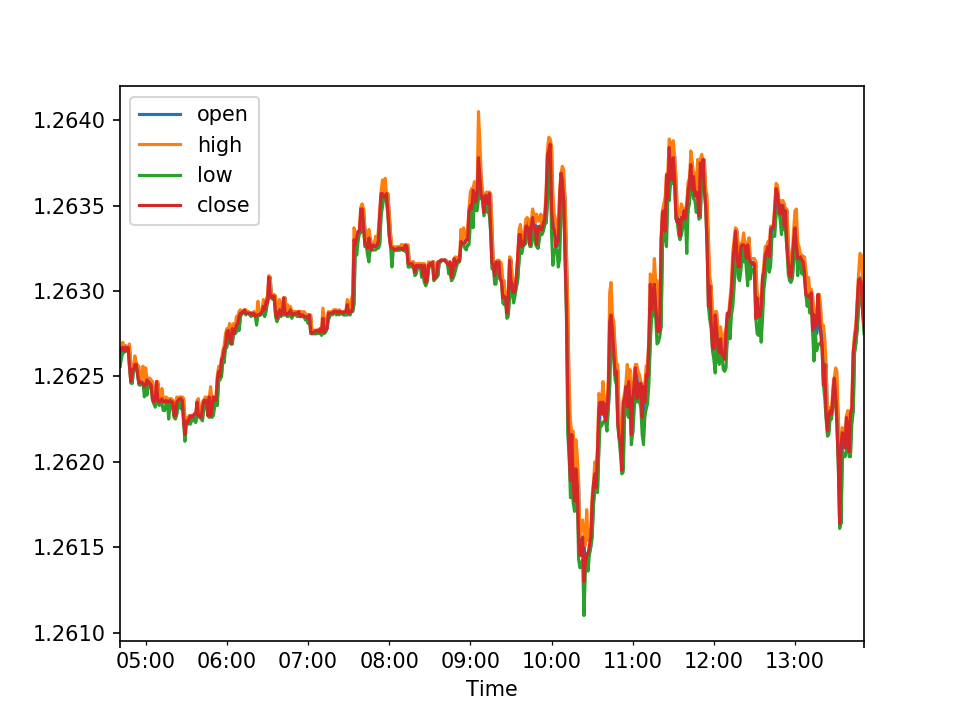

In [52]:
OHLCData.loc[:,'Bid'].plot()